In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
base_url1 = "https://intranet.swan.ac.uk/catalogue/default.asp?type=modbydept&dept=any&ayr=25/26&detailOnly=false"

#Bypassing Error 403:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0.0.0 Safari/537.36"
}

response = requests.get(base_url1, headers=headers)


In [ ]:
soup = BeautifulSoup(response.content, 'html5lib')
type(soup)

bs4.BeautifulSoup

In [ ]:
links1 = []
swansea = soup.find_all('a', href = re.compile("EG|PMP|CS"))
swansea_urls = [a['href'] for a in swansea if "GEG" not in a['href']]
links1.extend(swansea_urls)

swansea_urls

['/common/createCSV.asp',
 'default.asp?type=moddetail&dept=any&mod=EG-133&ayr=25/26&psl=TB1&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EG-135&ayr=25/26&psl=TB2&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EG-161&ayr=25/26&psl=TB2&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EG-163&ayr=25/26&psl=TB1&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EG-165&ayr=25/26&psl=TB2&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EG-194&ayr=25/26&psl=TB1&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EGA118&ayr=25/26&psl=TB2&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EGA119&ayr=25/26&psl=TB1&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EGA126&ayr=25/26&psl=TB1%2B2&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EGA128&ayr=25/26&psl=TB1%2B2&detailOnly=false',
 'default.asp?type=moddetail&dept=any&mod=EGA133&ayr=25/26&psl=TB1%2B2&detailOnly=false',
 'default.asp?ty

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" xml:lang="en">
 <head>
  <title>
   Module categories | Learn
  </title>
  <link href="https://learn.lboro.ac.uk/theme/image.php/boost_union/theme/1752596302/favicon" rel="shortcut icon"/>
  <style type="text/css">
   .admin_settingspage_tabs_with_tertiary .dropdown-toggle { font-size: 1.875rem !important; }
h2:has(+ .admin_settingspage_tabs_with_tertiary) { display: none; }
  </style>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="moodle, Module categories | Learn" name="keywords"/>
  <link href="https://learn.lboro.ac.uk/theme/yui_combo.php?rollup/3.18.1/yui-moodlesimple-min.css" rel="stylesheet" type="text/css"/>
  <script id="firstthemesheet" type="text/css">
   /** Required in order to fix style inclusion problems in IE with YUI **/
  </script>
  <link href="https://learn.lboro.ac.uk/theme/styles.php/boost_union/1752596302_1751909387/all" rel="stylesheet" type="text/css"/>
  <script>
   //<![CDATA[


In [ ]:
#----------IGNORE FOR SWANSEA------------

#Trying a loop to account for pagination:

modules = []
for x in range (0,15):
  base_url = f"https://courses.warwick.ac.uk/?keywords=&departments=CH&departments=CS&departments=PX&departments=ES&departments=WM&academicYears=2024&page={x}"
  html = urlopen(base_url)

  soup = BeautifulSoup(html, 'lxml')
  type(soup)

  warwick = soup.find_all('a', href=re.compile("modules"))
  warwick_urls = [a['href'] for a in warwick]

  modules.extend(warwick_urls)


In [ ]:
base_url2 = "https://intranet.swan.ac.uk/catalogue/"

links2 = []
for i in links1:
  links2.append(base_url2 + i)

links2

['https://intranet.swan.ac.uk/catalogue//common/createCSV.asp',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-133&ayr=25/26&psl=TB1&detailOnly=false',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-135&ayr=25/26&psl=TB2&detailOnly=false',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-161&ayr=25/26&psl=TB2&detailOnly=false',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-163&ayr=25/26&psl=TB1&detailOnly=false',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-165&ayr=25/26&psl=TB2&detailOnly=false',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-194&ayr=25/26&psl=TB1&detailOnly=false',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EGA118&ayr=25/26&psl=TB2&detailOnly=false',
 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&d

In [ ]:
links_unique = dict.fromkeys(links2)
print(list(links_unique))

['https://intranet.swan.ac.uk/catalogue//common/createCSV.asp', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-133&ayr=25/26&psl=TB1&detailOnly=false', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-135&ayr=25/26&psl=TB2&detailOnly=false', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-161&ayr=25/26&psl=TB2&detailOnly=false', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-163&ayr=25/26&psl=TB1&detailOnly=false', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-165&ayr=25/26&psl=TB2&detailOnly=false', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-194&ayr=25/26&psl=TB1&detailOnly=false', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EGA118&ayr=25/26&psl=TB2&detailOnly=false', 'https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&

In [ ]:
len(links_unique)

778

In [ ]:
swansea_rawdata = []
for i,url in enumerate(links_unique, start = 1):
    try:
        print(f"\n--- Scraping URL {i}: {url} ---")
        response1 = requests.get(url, headers = headers)
        page_soup = BeautifulSoup(response1.content, "html.parser")
        header = page_soup.find("div", string="Transferable Skills")

#ChatGPT helped with the "skillstext" part!

        skillstext = []
        if header:
          for sibling in header.find_next_siblings():
            if sibling.name == "Reading List":
              break

            skillstext.append(sibling.get_text(strip = True))

        swansea_rawdata.extend(skillstext)

    except Exception as e:
        print (f"Failed to scrape {url}: {e}")


--- Scraping URL 1: https://intranet.swan.ac.uk/catalogue//common/createCSV.asp ---

--- Scraping URL 2: https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-133&ayr=25/26&psl=TB1&detailOnly=false ---

--- Scraping URL 3: https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-135&ayr=25/26&psl=TB2&detailOnly=false ---

--- Scraping URL 4: https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-161&ayr=25/26&psl=TB2&detailOnly=false ---

--- Scraping URL 5: https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-163&ayr=25/26&psl=TB1&detailOnly=false ---

--- Scraping URL 6: https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-165&ayr=25/26&psl=TB2&detailOnly=false ---

--- Scraping URL 7: https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-194&ayr=25/26&psl=TB1&detailOnly=false ---

--- Scraping URL 8: https://intranet.swan.ac

In [ ]:
swan_link = "https://intranet.swan.ac.uk/catalogue/default.asp?type=moddetail&dept=any&mod=EG-133&ayr=25/26&psl=TB1&detailOnly=false"
response2 = requests.get(swan_link, headers = headers)
pagesoup1 = BeautifulSoup(response2.content, "html.parser")
header = pagesoup1.find("div", string="Transferable Skills")

skillstext1 = []
if header:
  for sibling in header.find_next_siblings():
            if sibling.name == "Reading List":
              break
            skillstext1.append(sibling.get_text(strip = False))


skillstext1

['Tackling open-ended problemsCommunicationGroup work']

In [ ]:
swansea_rawdata

['Tackling open-ended problemsCommunicationGroup work',
 '- Time management- Communication and group working with peers, including written and communication skills.- Display critical thinking skills.- Practical interview and application experiences.- Workplace understanding to enhance continuous learning and development.- Placement provider expectations and workplace requirements',
 'Having successfully completed the module, you will be able to:- study and learn independently- use a variety of sources for learning- plan and meet your own deadlines- prioritise competing demands- approach problem solving in a systematic manner- demonstrate study and time management skills',
 'Problem solving, communication, and working with others, as well as the effective use of general IT facilities and information retrieval skills. They also include planning self-learning and improving performance, as the foundation for lifelong learning/CPD.',
 'Problem solving, communication, and working with others

In [ ]:
with open("swansea_modules.txt", "w") as f:
  f.write(str(swansea_rawdata))

In [ ]:
SWANSEA_textfile = open("swansea_modules.txt", "r", encoding = "utf-8")
swanseatext = SWANSEA_textfile.read()
print(swanseatext)

['Tackling open-ended problemsCommunicationGroup work', '- Time management- Communication and group working with peers, including written and communication skills.- Display critical thinking skills.- Practical interview and application experiences.- Workplace understanding to enhance continuous learning and development.- Placement provider expectations and workplace requirements', 'Having successfully completed the module, you will be able to:- study and learn independently- use a variety of sources for learning- plan and meet your own deadlines- prioritise competing demands- approach problem solving in a systematic manner- demonstrate study and time management skills', 'Problem solving, communication, and working with others, as well as the effective use of general IT facilities and information retrieval skills. They also include planning self-learning and improving performance, as the foundation for lifelong learning/CPD.', 'Problem solving, communication, and working with others, as

In [ ]:
%pip install nltk
%pip install gensim
%pip install wordcloud

import nltk
from nltk import word_tokenize
from nltk.corpus import SentimentIntensityAnalyser
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import coherencemodel
from wordcloud import WordCloud

from PIL import Image
import random


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requir

ImportError: cannot import name 'SentimentIntensityAnalyser' from 'nltk.corpus' (/usr/local/lib/python3.12/dist-packages/nltk/corpus/__init__.py)

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
wordcloud_text_swan = swanseatext.lower()

wordcloud_text_swan=re.sub("[^a-zA-Z0-9]", " ", wordcloud_text_swan)
wordcloud_text_swan = re.sub(" n ", " ", wordcloud_text_swan)
wordcloud_text_swan = re.sub(" r ", " ", wordcloud_text_swan)


In [ ]:
wordcloud_text_swan

'  tackling open ended problemscommunicationgroup work      time management  communication and group working with peers  including written and communication skills   display critical thinking skills   practical interview and application experiences   workplace understanding to enhance continuous learning and development   placement provider expectations and workplace requirements    having successfully completed the module  you will be able to   study and learn independently  use a variety of sources for learning  plan and meet your own deadlines  prioritise competing demands  approach problem solving in a systematic manner  demonstrate study and time management skills    problem solving  communication  and working with others  as well as the effective use of general it facilities and information retrieval skills  they also include planning self learning and improving performance  as the foundation for lifelong learning cpd     problem solving  communication  and working with others  a

In [ ]:
tokens = word_tokenize(wordcloud_text_swan, language = "english")
tokens = (word for word in tokens if word not in stopwords.words("english"))
tokens = (word for word in tokens if len(word) >= 3)

In [ ]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

text = " " + swanseatext + "  "
text = text.replace("\n"," ")
text = re.sub(prefixes,"\\1<prd>",text)
text = re.sub(websites,"<prd>\\1",text)
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
if "..." in text: text = text.replace("...","<prd><prd><prd>")
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>")
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")
text = text.replace("<prd>",".")
words = text.split("<stop>")
words = [s.strip() for s in words]
words1 = pd.DataFrame(words)
words1.columns = ['word']

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2038669322.py:4: SyntaxWarning: invalid escape sequence '\s'
  starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
/tmp/ipython-input-2038669322.py:16: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)


In [ ]:
print(len(words1))
print(words1.head(10))

1733
                                                word
0  ['Tackling open-ended problemsCommunicationGro...
1                - Display critical thinking skills.
2  - Practical interview and application experien...
3  - Workplace understanding to enhance continuou...
4  - Placement provider expectations and workplac...
5  They also include planning self-learning and i...
6  ', 'Problem solving, communication, and workin...
7  Planning self-learning and improving performan...
8                              Project presentation.
9  ', 'At the end of this module students who hav...


In [ ]:
from wordcloud import WordCloud


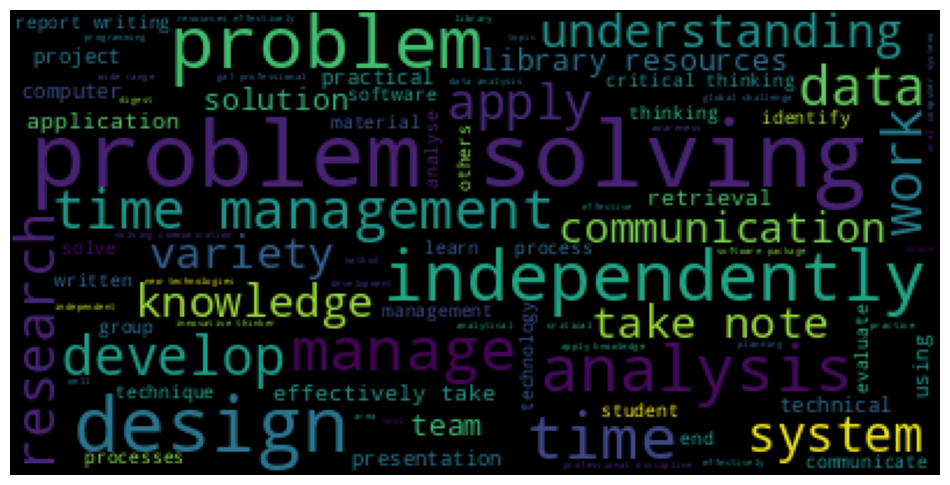

In [ ]:
stopwords_wc = set(stopwords.words("english"))
stopwords_wc.update(["key", "transferable", "information", "x80", "module", "students", "learning", "outcome", "skills", "engineering", "including", "relevant", "use", "able", "completion", "broadly", "defined", "academic", "demonstrated", "following", "ability", "working", "library resources", "sources", "study"])

wordcloud = WordCloud(max_words = 100, stopwords = stopwords_wc, random_state = 1).generate(wordcloud_text_swan)
plt.figure(figsize = (12,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

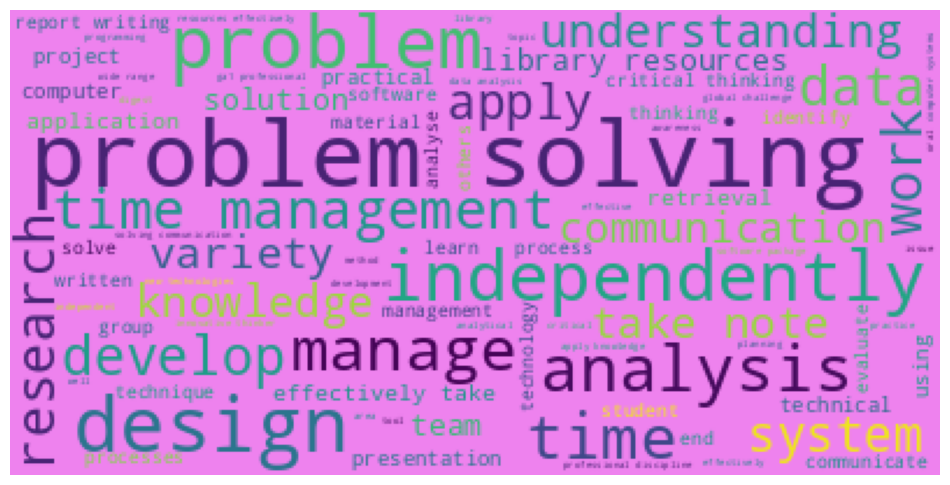

In [ ]:
wordcloud = WordCloud(background_color = "violet", max_words = 100, stopwords = stopwords_wc, random_state = 1).generate(wordcloud_text_swan)
plt.figure(figsize = (12,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'x80': 756, 'skills': 441, 'ability': 369, 'use': 294, 'problem': 276, 'solving': 272, 'information': 229, 'time': 206, 'analysis': 200, 'engineering': 181, ...})

In [ ]:
fdist.most_common(50)

[('x80', 756),
 ('skills', 441),
 ('ability', 369),
 ('use', 294),
 ('problem', 276),
 ('solving', 272),
 ('information', 229),
 ('time', 206),
 ('analysis', 200),
 ('engineering', 181),
 ('design', 179),
 ('study', 172),
 ('management', 168),
 ('working', 163),
 ('independently', 158),
 ('manage', 154),
 ('module', 152),
 ('problems', 143),
 ('effectively', 142),
 ('resources', 123),
 ('data', 122),
 ('learning', 121),
 ('communication', 120),
 ('students', 120),
 ('work', 119),
 ('apply', 117),
 ('knowledge', 113),
 ('thinking', 109),
 ('research', 107),
 ('writing', 97),
 ('library', 92),
 ('develop', 91),
 ('systems', 91),
 ('computer', 91),
 ('sources', 88),
 ('software', 86),
 ('critical', 84),
 ('mathematical', 82),
 ('able', 80),
 ('technical', 80),
 ('understanding', 74),
 ('project', 73),
 ('take', 73),
 ('practical', 71),
 ('effective', 69),
 ('notes', 68),
 ('report', 68),
 ('written', 67),
 ('variety', 67),
 ('professional', 66)]

<function matplotlib.pyplot.show(close=None, block=None)>

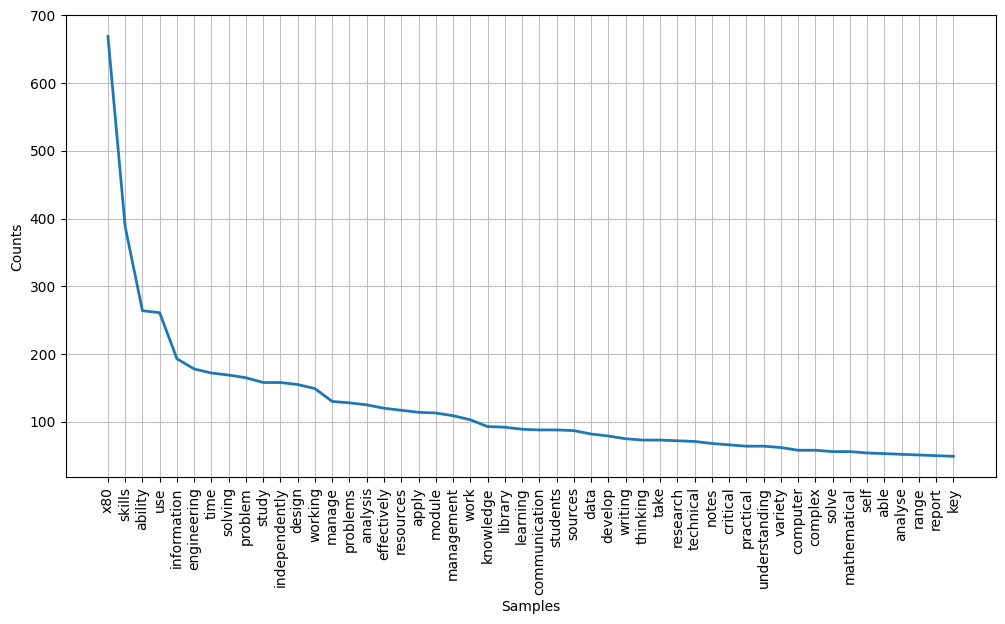

In [ ]:
plt.figure(figsize =(12,6))
fdist.plot(50, cumulative = False)
plt.show